## **Importing Libraries and Data**

In [2]:
!pip install -r requirements.txt

  Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl (45 kB)
Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl (12 kB)
Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl (27 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
  Attempting uninstall: gspread_pandas
    Found existing installation: gspread-pandas 2.2.3
    Uninstalling gspread-pandas-2.2.3:
      Successfully uninstalled gspread-pandas-2.2.3


In [3]:
#Importing
%pip install python-gnupg
%pip install eep153_tools
%matplotlib inline
import pandas as pd
import numpy as np
import eep153_tools
import cfe
from cfe import Regression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
%run Acquiring_Dataframes.py

## Nutritional Adequacy of Diet

### Uganda 19-20

In [5]:
#Get saved result
ugd8_result = cfe.read_pickle('RGSN Files/Uganda19-20.rgsn')
#Define predicted expenditures
xhat = ugd8_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd8_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [6]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          175094.385522
Protein           3471.170520
Fiber             2564.167603
Folate           38557.281698
Calcium          23378.859326
Carbohydrate     23565.723919
Iron               892.313038
Niacin             958.808443
Riboflavin          77.230405
Thiamin            113.501647
Vitamin A        24100.648657
Vitamin B-12        74.543893
Vitamin B-6        190.510107
Vitamin C        11165.587302
Zinc               519.223700
Magnesium          277.867875
Phosphorus        3824.033113
Potassium         2645.579390
Vitamin E           77.415363
Vitamin K         1225.169614
dtype: float64

In [7]:
#Obtain recommended daily intake
ugd8_z = ugd8_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd8_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,2.784719,2.288790,3.149960,3.274534,0.666467,5.684732,2.340870,2.092289,2.290568,3.447899,1.273880,1.138145,5.081356,6.297189,1.789562,0.022115,0.106459,0.015091,0.169874,0.469856
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,2.888203,2.344283,3.105391,3.499421,0.681304,5.134548,2.649667,2.014716,2.378947,3.343219,1.251791,1.341274,4.387771,6.101486,1.764122,0.021820,0.098266,0.014595,0.197549,0.548062
00246782f8654441a9df0f6ec0b6fc9f,2019-20,Northern,1.321786,1.107648,1.323919,1.667790,0.305472,2.166847,1.111159,0.910625,1.029216,1.584880,0.578632,0.496349,2.255576,2.997695,0.843675,0.017967,0.089606,0.009116,0.105449,0.250820
005fbc5779014a0290b088071bde9f72,2019-20,Central,8.794701,7.103284,8.398851,8.183142,1.618183,14.596403,5.215948,6.598164,7.302975,9.375749,2.898919,3.772683,12.971829,11.550934,5.317597,0.079793,0.309033,0.060209,0.500473,1.555854
009c1baa0edb44f8af47773ce0b7caaa,2019-20,Western,4.153315,5.077180,5.060661,6.997727,0.768005,6.545707,4.249626,3.532972,3.866663,5.801052,1.324865,1.825030,8.480675,10.232010,2.987377,0.042631,0.116723,0.019979,0.259426,0.696737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff77648719664071a4e363956db92c08,2019-20,Eastern,5.748807,4.869138,5.193981,5.565470,0.982973,9.207487,3.337413,4.102908,4.437507,6.528608,2.372326,1.957540,10.154668,12.409324,3.411489,0.058492,0.208280,0.035890,0.392075,1.113027
ff8b330984bc466aaf2366c3eea3d8cc,2019-20,Northern,1.747887,1.796394,2.168714,2.793039,0.466158,3.256285,1.765293,1.399987,1.529019,2.609390,1.158748,0.533619,3.813112,4.913856,1.279090,0.018795,0.084450,0.009804,0.101481,0.214972
ffb33b3ededa4019a02be24224ab0440,2019-20,Western,2.333308,2.210416,2.813329,2.886904,0.540596,4.925433,2.148473,1.998521,1.957003,3.014373,0.662025,0.919350,4.510046,4.178632,1.671017,0.013287,0.069189,0.010024,0.096845,0.238948


In [8]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/19-20 Nutrient Data.csv')

<Axes: >

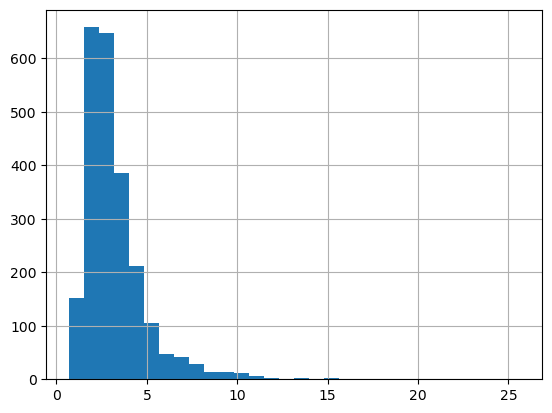

In [9]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

In [ ]:
## Determine Nutritional Deficiencies 

In [10]:
#Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#2019-20 Data
#Prices
ugd4_p0 = pd.read_csv('Data Files/Uganda - Food Prices (2005-06).csv')
ugd4_p0 = ugd4_p0[ugd4_p0["u"] == "Kg"]
ugd4_p = pd.pivot_table(ugd4_p0, values="price", index=["j","u"], columns=["t","m"] , aggfunc="median")
#Food Expenditures
ugd4_x0 = pd.read_csv('Data Files/Uganda - Food Expenditures (2005-06).csv')
ugd4_x0['i'] = ugd4_x0['i'].astype(str)
ugd4_x = pd.pivot_table(ugd4_x0, values="Expenditure", index=["i","t","m"], columns="j" , aggfunc="median")
#Consumption
ugd4_x_long = ugd4_x.stack().reset_index(name="Expenditure")
ugd4_p_long = ugd4_p0
ugd4_c = ugd4_x_long.merge(ugd4_p_long, on=["j", "t", "m"], how="left")
ugd4_c["Consumption"] = ugd4_c["Expenditure"] / ugd4_c["price"]
ugd4_c = ugd4_c.pivot_table(values="Consumption", index=["i","t","m","u"], columns="j", aggfunc="sum")
#HH Characteristics
ugd_z0 = pd.read_csv('Data Files/Uganda - Household Characteristics.csv')
ugd4_z = ugd_z0[ugd_z0['t'] == '2005-06']
ugd4_z = ugd4_z.set_index(['i','t','m'])
ugd4_z.columns.name = 'k'
ugd4_z.fillna(0, inplace=True)

#Prices
ugd8_p0 = pd.read_csv('Data Files/Uganda - Food Prices (2019-20).csv')
ugd8_p0 = ugd8_p0[ugd8_p0["u"] == "Kg"]
ugd8_p = pd.pivot_table(ugd8_p0, values="price", index=["j","u"], columns=["t","m"] , aggfunc="median")
#Food Expenditures
ugd8_x0 = pd.read_csv('Data Files/Uganda - Food Expenditures (2019-20).csv')
ugd8_x0['i'] = ugd8_x0['i'].astype(str)
ugd8_x = pd.pivot_table(ugd8_x0, values="Expenditure", index=["i","t","m"], columns="j" , aggfunc="median")
#Consumption
ugd8_x_long = ugd8_x.stack().reset_index(name="Expenditure")  # Ensure values are in a column
ugd8_p_long = ugd8_p0
ugd8_c = ugd8_x_long.merge(ugd8_p_long, on=["j", "t", "m"], how="left")
ugd8_c["Consumption"] = ugd8_c["Expenditure"] / ugd8_c["price"]
ugd8_c = ugd8_c.pivot_table(values="Consumption", index=["i","t","m","u"], columns="j", aggfunc="sum")
#HH Characteristics
ugd8_z = ugd_z0[ugd_z0['t'] == '2019-20']
ugd8_z = ugd8_z.set_index(['i','t','m'])
ugd8_z.columns.name = 'k'
ugd8_z.fillna(0, inplace=True)

In [12]:
#FCT and RDI
#FCT
ugd_fct = pd.read_csv('Data Files/Uganda - FCT.csv')
ugd_fct = ugd_fct.rename(columns={"index":"j"}).set_index(["j"])
ugd_fct.columns.name = 'n'
#RDI
ugd_rdi = pd.read_csv('Data Files/Uganda - RDA.csv')
ugd_rdi = ugd_rdi.set_index(["n"])
ugd_rdi.columns.name = 'k'

In [13]:
#19-20 Avg Expenditure
row_sums8 = ugd8_x.sum(axis=1)
mean_row_sum8 = row_sums8.mean()

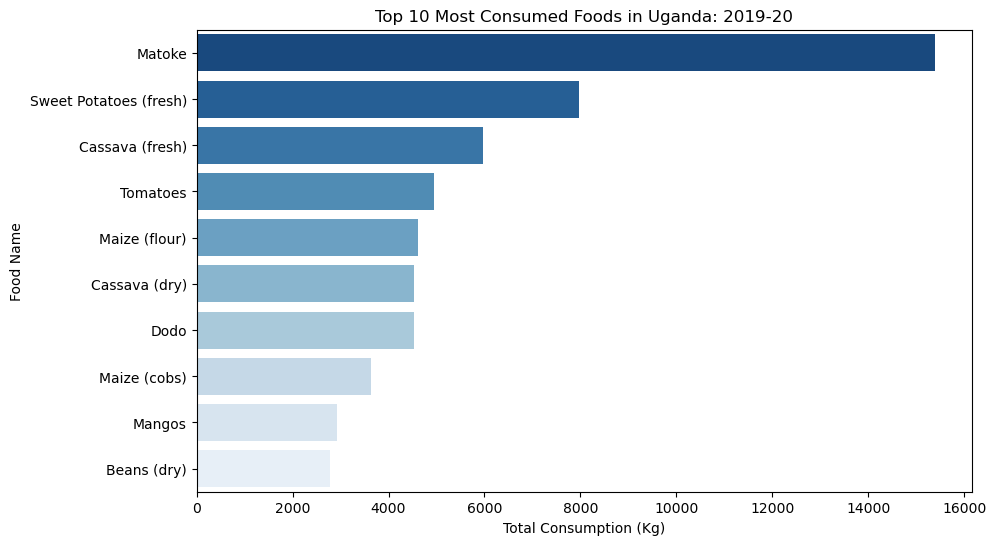

In [15]:
#19-20 Consumption by food, descending
column_sums8 = ugd8_c.sum()
sorted_sums8 = column_sums8.sort_values(ascending=False)
# Select the top 10 most consumed foods
top_10_foods8 = sorted_sums8.nlargest(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_foods8.values, y=top_10_foods8.index, hue=top_10_foods8.index, palette="Blues_r", legend=False)
# Labels and title
plt.xlabel("Total Consumption (Kg)")
plt.ylabel("Food Name")
plt.title("Top 10 Most Consumed Foods in Uganda: 2019-20")
plt.show()

### Nutrient Sufficiency Over Time

In [16]:
# Read in the nutrient ratio data for each year
nutrient_data = {
    '2005-06': pd.read_csv('Nutrient Data/05-06 Nutrient Data.csv'),
    '2009-10': pd.read_csv('Nutrient Data/09-10 Nutrient Data.csv'),
    '2010-11': pd.read_csv('Nutrient Data/10-11 Nutrient Data.csv'),
    '2011-12': pd.read_csv('Nutrient Data/11-12 Nutrient Data.csv'),
    '2013-14': pd.read_csv('Nutrient Data/13-14 Nutrient Data.csv'),
    '2015-16': pd.read_csv('Nutrient Data/15-16 Nutrient Data.csv'),
    '2018-19': pd.read_csv('Nutrient Data/18-19 Nutrient Data.csv'),
    '2019-20': pd.read_csv('Nutrient Data/19-20 Nutrient Data.csv'),
}

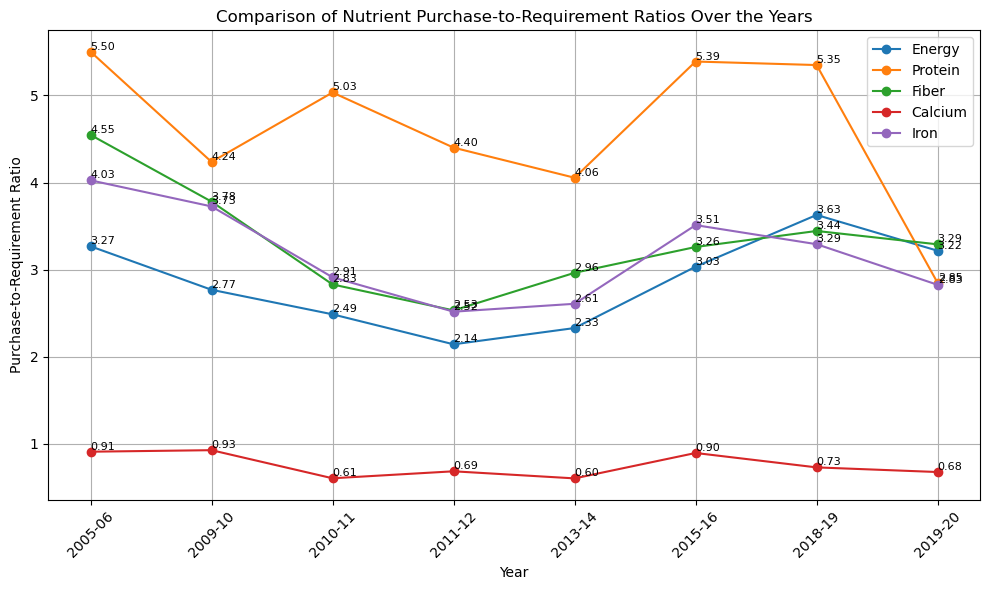

In [17]:
# List of nutrients to analyze
nutrients = ['Energy', 'Protein', 'Fiber', 'Calcium', 'Iron']
# Create a dictionary to hold the nutrient ratios per year for each nutrient
nutrient_ratios = {nutrient: {} for nutrient in nutrients}
# Loop through each nutrient and calculate the ratio for each year
for nutrient in nutrients:
    for year, df in nutrient_data.items():
        nutrient_ratios[nutrient][year] = df[nutrient].mean() 
# Create a plot
plt.figure(figsize=(10, 6))

# Plot each nutrient's ratio over the years
for nutrient in nutrients:
    years = list(nutrient_ratios[nutrient].keys())
    values = list(nutrient_ratios[nutrient].values())
    plt.plot(years, values, marker='o', linestyle='-', label=f'{nutrient}')
    
    # Add text labels to each point
    for x, y in zip(years, values):
        plt.text(x, y, f'{y:.2f}', fontsize=8, ha='left', va='bottom')

# Customize plot
plt.title('Comparison of Nutrient Purchase-to-Requirement Ratios Over the Years')
plt.xlabel('Year')
plt.ylabel('Purchase-to-Requirement Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
# Display
plt.tight_layout()
plt.show()

In the period 2019-2020, the average household only purchased 68% of their nutritional requirement of calcium. 

Bioengineered carrots 

Now, we aim to see what price would be required to increase demand by ~30% for milk in order to meet calcium requirements.

### Demand for Calcium (Milk)

In [13]:
#2019-20
ugd8_result = cfe.Regression(y=np.log(ugd8_x.stack()),d=ugd8_z)


**Budgets:** Get food budget for all households, then find median budget

In [14]:
xhat = ugd8_result.predicted_expenditures()
#Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()
#Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

Index(['Avocado', 'Beans (dry)', 'Beans (fresh)', 'Beef', 'Bogoya', 'Bread',
       'Cabbage (green)', 'Cassava (dry)', 'Cassava (fresh)', 'Chapati',
       'Cooking Oil (refined)', 'Dodo', 'Donuts', 'Eggplant', 'Eggs',
       'Goat Meat', 'Ground Nuts (pounded)', 'Ground Nuts (shelled)',
       'Irish Potatoes', 'Jam/Marmalade', 'Maize (cobs)', 'Maize (flour)',
       'Mangos', 'Matoke', 'Millet Flour', 'Mukene', 'Onions', 'Oranges',
       'Other Vegetables', 'Pawpaw', 'Pumpkins', 'Restaurant (food)',
       'Restaurant (soda)', 'Rice', 'Salt', 'Sweet Potatoes (fresh)',
       'Tea (leaves)', 'Tomatoes', 'Waragi', 'Yams (arrowroot)'],
      dtype='object', name='j')

In [15]:
#Prices per kilogram:
pbar = ugd8_p.mean(axis=1)
pbar = pbar.reset_index(level="u", drop=True) #Reset index so that 'j' becomes a column instead of part of a MultiIndex
pbar = pbar.reindex(ugd8_result.beta.index) #Only use prices for goods we can estimate
#Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar = pbar.replace(np.nan,1)
#Define a function to change a single price in the vector $p$:
def my_prices(p0,j,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [ ]:
# Check to see which food items exist 
tmp = ugd8_result.predicted_expenditures()
tmp.index.get_level_values('j').unique()

Text(0.5, 0, 'Quantities of Tomatoes Demanded')

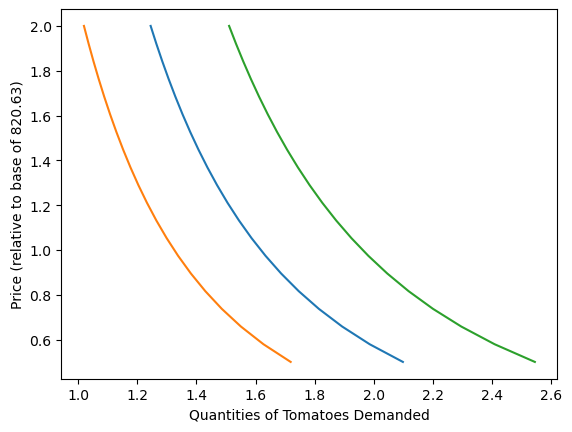

In [16]:


use = 'Tomatoes'  #Good we want demand curve for

#Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

#Demand for Millet for household at median budget
plt.plot([ugd8_result.demands(xref,my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

#Demand for Millet for household at 25% percentile
plt.plot([ugd8_result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

#Demand for Millet for household at 75% percentile
plt.plot([ugd8_result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")